In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/forest-fires-in-brazil/amazon.csv


In [2]:
az = pd.read_csv('/kaggle/input/forest-fires-in-brazil/amazon.csv', encoding = 'iso-8859-1')

In [3]:
# Number of Dimensions , Shape and data structure
az.ndim


2

In [4]:
az.shape


(6454, 5)

In [5]:
az.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
# To determine count , mean , std, min and quartiles
az.describe()


,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [7]:
#Checking for Null Values
az.isnull().count()

year      6454
state     6454
month     6454
number    6454
date      6454
dtype: int64

In [8]:
az.isnull()

,year,state,month,number,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6449,False,False,False,False,False
6450,False,False,False,False,False
6451,False,False,False,False,False
6452,False,False,False,False,False


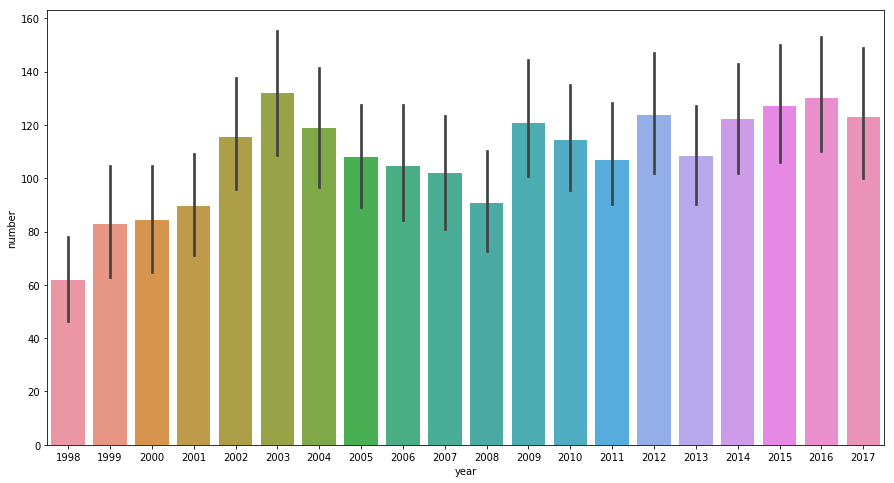

In [9]:
#Plotting different variables to see the distribution
import seaborn as sns
plt.figure(figsize=(15,8))
plot1 = sns.barplot(x= 'year', y ='number', data = az)
# As we can see in below graph 2003, 12, 15 and 16 had more forest fires compared to other years

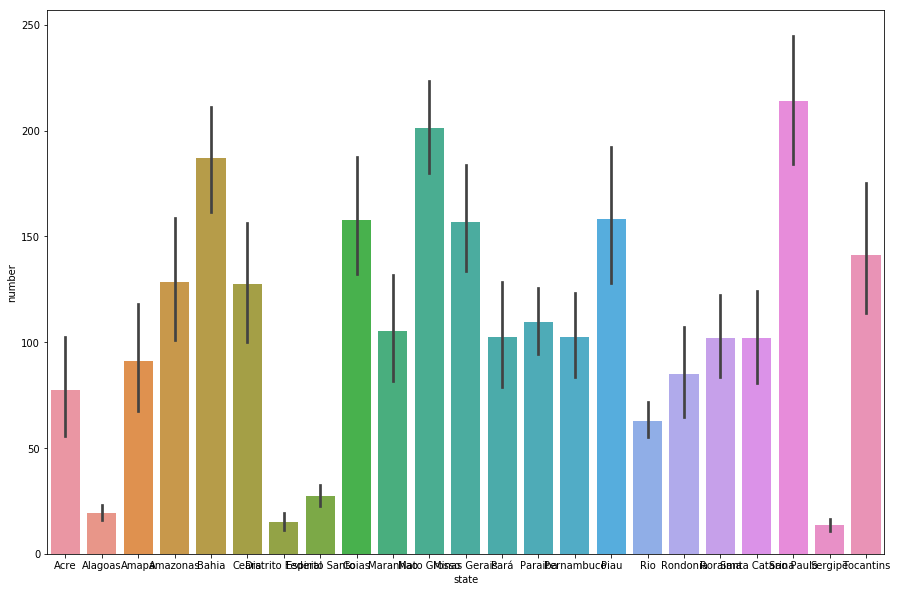

In [10]:
plt.figure(figsize=(15,10))
plot2 = sns.barplot(x= 'state', y ='number', data = az)


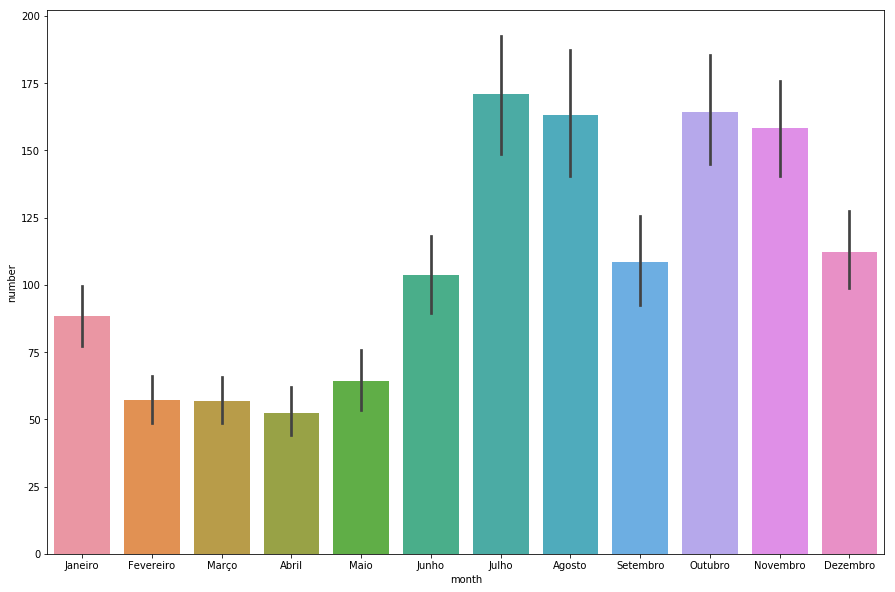

In [11]:
plt.figure(figsize=(15,10))
plot3 = sns.barplot(x= 'month', y ='number', data = az)

In [12]:
#Label Encoding for running Correlation and for running analysis
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(az['state'].drop_duplicates())
az['state']=encoder.transform(az['state'])
encoder.fit(az['month'].drop_duplicates())
az['month']=encoder.transform(az['month'])
encoder.fit(az['date'].drop_duplicates())
az['date']=encoder.transform(az['date'])

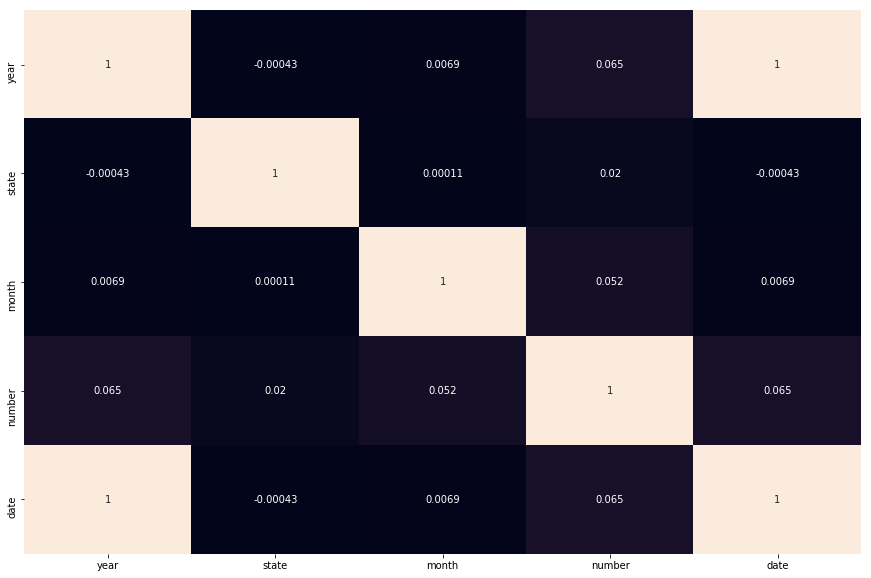

In [13]:
corr = az.corr()
plt.figure(figsize=(15,10))
sns.color_palette("Blues")
sns.heatmap(corr , annot=True , cbar=False)
plt.show()

In [14]:
#From the above visualizations we can see that
# 1.Forest Fires are significant in months of FEB, OCT, NOV
# 2.The state which was frequently subject to forest fire is SAO PALO
# 3.Years with most forest fire is 2003, 15,16 and 17 which seems very recent



In [15]:
X = az[['state','year','month','date']]
y = az['number']
X_train = X[:-30]
X_test  = X[-30:]
y_train = y[:-30]
y_test  = y[-30:]

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
gbm=GradientBoostingRegressor(n_estimators=100)
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)
error_gbm = metrics.mean_squared_error(y_test,y_pred_gbm)
print(np.sqrt(error_gbm))

215.23075423751942


In [17]:
gbm.feature_importances_
#From this it can be determined that Year and Month are most significant in predicting the Forest Fires 

array([0.55227097, 0.02006353, 0.40626119, 0.02140432])